In [89]:
import gym
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.activations import relu, linear
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

In [90]:
env = gym.make("MountainCar-v0")

In [91]:
env.observation_space # position, velocity

Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)

In [92]:
env.action_space # 0 - push left; 1 - no push; 2 - push right

Discrete(3)

In [93]:
import time
env.reset()
for i in range(50):
    env.render()
    if i < 20:
        new_state, reward, done, _ = env.step(0)
        print("iter:",i," velocity: %.3f" %new_state[1])
    if i > 20:
        new_state, reward, done, _ = env.step(2)
        print("iter:",i,"velocity: %.3f" %new_state[1])
    if done:
        env.close()
        break
    time.sleep(0.1)
env.close()

iter: 0  velocity: -0.001
iter: 1  velocity: -0.001
iter: 2  velocity: -0.002
iter: 3  velocity: -0.003
iter: 4  velocity: -0.003
iter: 5  velocity: -0.004
iter: 6  velocity: -0.005
iter: 7  velocity: -0.005
iter: 8  velocity: -0.006
iter: 9  velocity: -0.006
iter: 10  velocity: -0.007
iter: 11  velocity: -0.007
iter: 12  velocity: -0.007
iter: 13  velocity: -0.008
iter: 14  velocity: -0.008
iter: 15  velocity: -0.008
iter: 16  velocity: -0.008
iter: 17  velocity: -0.008
iter: 18  velocity: -0.008
iter: 19  velocity: -0.008
iter: 21 velocity: -0.006
iter: 22 velocity: -0.004
iter: 23 velocity: -0.002
iter: 24 velocity: 0.000
iter: 25 velocity: 0.003
iter: 26 velocity: 0.005
iter: 27 velocity: 0.007
iter: 28 velocity: 0.009
iter: 29 velocity: 0.011
iter: 30 velocity: 0.013
iter: 31 velocity: 0.015
iter: 32 velocity: 0.017
iter: 33 velocity: 0.018
iter: 34 velocity: 0.020
iter: 35 velocity: 0.021
iter: 36 velocity: 0.022
iter: 37 velocity: 0.023
iter: 38 velocity: 0.024
iter: 39 velocity

### Q - learning

In [94]:
NA = 3
NS = 2
epsilon = 1.0
epsilon_decay = 0.998
memory = deque()
batch_size = 64
gamma = 0.99

In [95]:
model = Sequential()
model.add(Dense(64, input_dim=NS, activation=relu))
model.add(Dense(64, activation=relu))
model.add(Dense(NA, activation=linear))
model.compile(loss='mse', optimizer=Adam(0.001))

In [96]:
def take_action(state):
    if np.random.rand() <= epsilon:
        return random.randrange(NA)
    qs = model.predict(state)
    return np.argmax(qs[0])

In [97]:
def change_matrix():
    global epsilon, epsilon_decay 
    if len(memory) < batch_size:
        return
    
    batch = random.sample(memory, batch_size)
    states = np.squeeze(np.array([i[0] for i in batch]))
    actions = np.array([i[1] for i in batch])
    rewards = np.array([i[2] for i in batch])
    next_states = np.squeeze(np.array([i[3] for i in batch]))
    dones = np.array([i[4] for i in batch])
    
    targets = model.predict_on_batch(states)
    targets[[i for i in range(len(actions))], [actions]] = rewards + gamma*(np.amax(model.predict_on_batch(next_states), axis=1))*(1-dones)
    
    model.fit(states, targets, epochs=1, verbose=0)
    if epsilon > 0.01:
        epsilon *= epsilon_decay

In [98]:
scores = []
episods = []
sc = []
for epoch in range(400):
    state = np.reshape(env.reset(), (1,2))
    score = 0
    for i in range(3000):
        action = take_action(state)
        env.render()
        next_state, reward, done, _ = env.step(action)
        score += reward
        modified_reward = reward + 10*abs(next_state[1])
        next_state = np.reshape(next_state, (1, 2))
        memory.append((stat  e, action, modified_reward, next_state, done))
        state = next_state
        change_matrix()
        if done:
            print("episode {} step {} => score {} ".format(epoch, i, score))
            episods.append(epoch)
            sc.append(score)
            break
        scores.append(score)
env.close()

episode 0 step 199 => score -200.0 
episode 1 step 199 => score -200.0 
episode 2 step 199 => score -200.0 
episode 3 step 199 => score -200.0 
episode 4 step 199 => score -200.0 
episode 5 step 199 => score -200.0 
episode 6 step 199 => score -200.0 
episode 7 step 199 => score -200.0 
episode 8 step 199 => score -200.0 
episode 9 step 199 => score -200.0 
episode 10 step 199 => score -200.0 
episode 11 step 199 => score -200.0 
episode 12 step 199 => score -200.0 
episode 13 step 199 => score -200.0 
episode 14 step 199 => score -200.0 
episode 15 step 199 => score -200.0 
episode 16 step 199 => score -200.0 
episode 17 step 199 => score -200.0 
episode 18 step 199 => score -200.0 
episode 19 step 199 => score -200.0 
episode 20 step 199 => score -200.0 
episode 21 step 199 => score -200.0 
episode 22 step 199 => score -200.0 
episode 23 step 199 => score -200.0 
episode 24 step 199 => score -200.0 
episode 25 step 199 => score -200.0 
episode 26 step 187 => score -188.0 
episode 27 

episode 220 step 111 => score -112.0 
episode 221 step 109 => score -110.0 
episode 222 step 86 => score -87.0 
episode 223 step 151 => score -152.0 
episode 224 step 98 => score -99.0 
episode 225 step 110 => score -111.0 
episode 226 step 116 => score -117.0 
episode 227 step 109 => score -110.0 
episode 228 step 170 => score -171.0 
episode 229 step 112 => score -113.0 
episode 230 step 109 => score -110.0 
episode 231 step 95 => score -96.0 
episode 232 step 152 => score -153.0 
episode 233 step 93 => score -94.0 
episode 234 step 104 => score -105.0 
episode 235 step 106 => score -107.0 
episode 236 step 103 => score -104.0 
episode 237 step 109 => score -110.0 
episode 238 step 114 => score -115.0 
episode 239 step 108 => score -109.0 
episode 240 step 88 => score -89.0 
episode 241 step 142 => score -143.0 
episode 242 step 109 => score -110.0 
episode 243 step 142 => score -143.0 
episode 244 step 112 => score -113.0 
episode 245 step 150 => score -151.0 
episode 246 step 108 =

Text(0, 0.5, 'score')

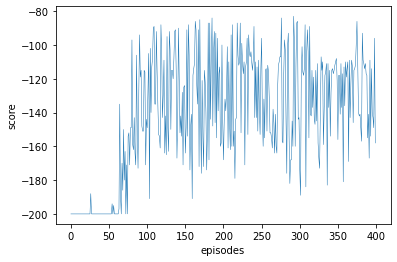

In [101]:
plt.plot(episods,sc, lw = 0.5)
plt.xlabel('episodes')
plt.ylabel("score")

In [103]:
state = np.reshape(env.reset(), (1,2))
for t in range(1000):
    action = take_action(state)
    next_state, reward, done, info = env.step(action) 
    next_state = np.reshape(next_state, (1,2))
    state = next_state
    if done:
         break
    env.render()
env.close()